# Lead Scoring Case Study

### Importing important libraries required for performing analysis and model building

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the necessary packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

## 1. Reading and understanding the Data

In [3]:
# Reading Data

df=pd.read_csv("Leads.csv")

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Looking into the physical structure of the Dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Looking into the statistical description of the numerical data elements

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Looking into the shape of the Dataframe

In [7]:
df.shape

(9240, 37)

### Dropping unnecessary columns

The columns "Prospect ID",'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Tags' are not logically much significant. Hence these are dropped from the Dataframe.

In [8]:
# Drop column that is not required for this analysis
df=df.drop(["Prospect ID",'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Tags'], axis=1)

Inspecting the Dataframe after dropping the unnecessary columns.

In [9]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Low in Relevance,No,No,Select,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,NaN,No,No,Select,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Might be,No,No,Select,Mumbai,No,No,Modified


### Checking the percentage of null values in each column.

In [10]:
round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Replacing 'Select' from the categorical columns with NaN (null)

In [11]:
# Replace 'select' value with np.nan

df=df.replace('Select', np.nan)

Checking if the replacement of 'Select' to NaN worked propoerly or not.

In [12]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Low in Relevance,No,No,NaN,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,NaN,No,No,NaN,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Not Sure,No,No,NaN,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Might be,No,No,NaN,Mumbai,No,No,Modified


### Again, checking the null percentage in each column after replacing 'Select' with null values.

In [13]:
#Checking for null values in the dataset

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Dropping the 3 listed columns since the null percentage in them is very high ( > 50%) and with these many null values in them, they will not impact the target variable much.
- How did you hear about X Education
- Lead Quality
- Lead Profile

In [14]:
# Drop columns with high null values(greater than 50 %)

df=df.drop(["How did you hear about X Education","Lead Quality","Lead Profile"], axis=1)


### Checking the info of the Dataframe after dropping these columns mentioned above.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 

### Checking the nullpercentage after dropping columns with high null percentage

In [16]:
#Checking for null values in the dataset

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Checking the shape of the Dataframe again

In [17]:
df.shape

(9240, 28)

### Dropping the rows where there are more than 5 empty variables.

In [18]:
# Selecting rows having less than 5 null values

df=df.loc[~((df.isnull().sum(axis=1))>5)]


### Checking the head of the Dataframe to confirm if the deletion of rows based on the null variable criteria worked properly or not.

In [19]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9191 entries, 0 to 9239
Data columns (total 28 columns):
Lead Number                                      9191 non-null int64
Lead Origin                                      9191 non-null object
Lead Source                                      9161 non-null object
Do Not Email                                     9191 non-null object
Do Not Call                                      9191 non-null object
Converted                                        9191 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9191 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9126 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6508 

Checing the shape of the Dataframe again for the number of rows in the dataframe.

In [21]:
df.shape

(9191, 28)

We can see that the current number of rows in the Dataframe is 9191. We calculate the percentage of retained rows.

In [22]:
# Percantage of rows retained

round(len(df.index)/9240*100,2)

99.47

### The percentage of retained rows is 99.47%

### Checking the percentage of null values in each column.

In [23]:
round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.33
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.96
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.96
Last Activity                                     0.71
Country                                          26.24
Specialization                                   36.24
What is your current occupation                  29.19
What matters most to you in choosing a course    29.40
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We see from the above percentage representation that the below columns have null values:
- Lead Source
- TotalVisits
- Page Views Per Visit
- Last Activity
- Country
- Specialization
- What is your current occupation
- What matters most to you in choosing a course
- City

In [24]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9191.000000,9191.000000,9103.000000,9191.000000,9103.000000
mean,617134.287129,0.383419,3.445238,484.886846,2.362820
std,23391.993784,0.486245,4.854853,546.586262,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596448.500000,0.000000,1.000000,11.000000,1.000000
50%,615429.000000,0.000000,3.000000,247.000000,2.000000
75%,637289.500000,1.000000,5.000000,930.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### Imputing null values with mode/median/mean as applicable

For the columns TotalVisits, we impute the null values with median (3.0)

In [25]:
# Imputing TotalVisits with median

df['TotalVisits'].fillna(3.0, inplace=True)

For the columns Page Views Per Visit, we impute the null values with mode

In [26]:
# Imputing Page Views Per Visit with mean

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(), inplace=True)

In [27]:
df['Lead Source'].mode()

0    Google
dtype: object

For the column Lead Source, we impute the null values with mode - Google

In [28]:
df['Lead Source'].fillna('Google', inplace=True)

In [29]:
df['Last Activity'].mode()

0    Email Opened
dtype: object

For the column Last Activity, we impute the null values with mode - Email Opened

In [30]:
df['Last Activity'].fillna('Email Opened', inplace=True)

In [31]:
df['Country'].mode()

0    India
dtype: object

For the column Country, we impute the null values with mode - India

In [32]:
df['Country'].fillna('India', inplace=True)

In [33]:
df['Specialization'].mode()

0    Finance Management
dtype: object

For the column Specialization, we impute the null values with mode - Financial Management

In [34]:
df['Specialization'].fillna('Finance Management', inplace=True)

In [35]:
df['What is your current occupation'].mode()

0    Unemployed
dtype: object

For the column What is your current occupation, we impute the null values with mode - Unemployed

In [36]:
df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [37]:
df['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

For the column What matters most to you in choosing a course, we impute the null values with mode - Better Career Prospects

In [38]:
df['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [39]:
df['City'].mode()

0    Mumbai
dtype: object

For the column City, we impute the null values with mode - Mumbai

In [40]:
df['City'].fillna('Mumbai', inplace=True)

### After all the imputations, we check the null percentage of the columns to check if we missed anthing

In [41]:
round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

### We check the percentage of rows retained

In [42]:
# Percantage of rows retained

round(len(df.index)/9240*100,2)

99.47

We see that the percentage of rows retained remains same as 99.47%

## 2. Visualising the Data

### Using pair plot to establish the correlation if any between the numeric variables

<Figure size 1152x720 with 0 Axes>

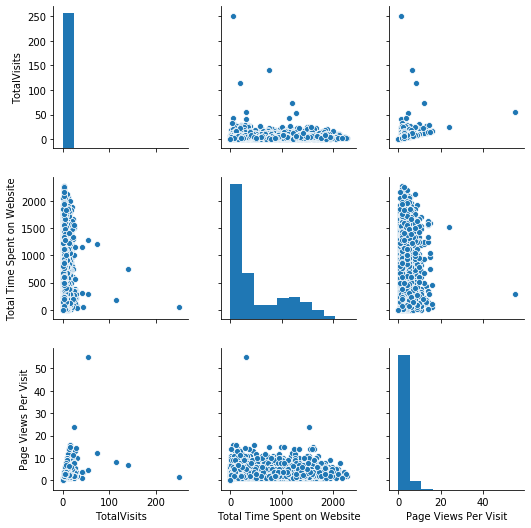

In [43]:
# Pairplot for the numerical variables
plt.figure(figsize=[16,10])
sns.pairplot(df, vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

There is a very little correlation between TotalVisits and Page Views Per Visit

### Using box plots to check the outliers in the numeric fields

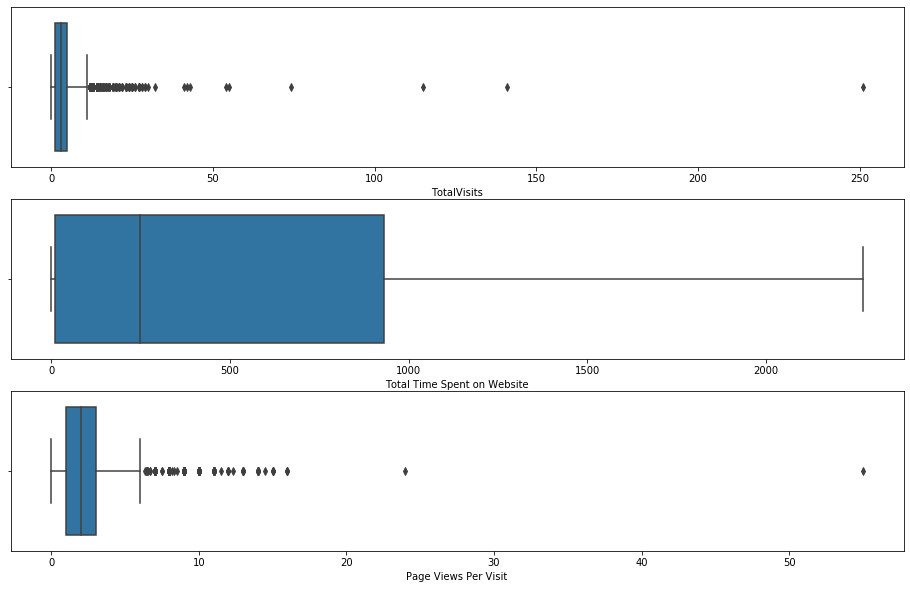

In [44]:
# creating boxplots to identify outliers

plt.figure(figsize=[16,10])
plt.subplot(311)
sns.boxplot(df['TotalVisits'])
plt.subplot(312)
sns.boxplot(df['Total Time Spent on Website'])
plt.subplot(313)
sns.boxplot(df['Page Views Per Visit'])
plt.show()

#### Treating outliers by capping the upper limit of the fields to 99 percentile

In [45]:
TV_Q4 = df['TotalVisits'].quantile(0.99)
PVV_Q4 = df['Page Views Per Visit'].quantile(0.99)

In [46]:
df['TotalVisits'] = np.where((df['TotalVisits'] >= TV_Q4), TV_Q4, df['TotalVisits'])
df['Page Views Per Visit'] = np.where((df['Page Views Per Visit'] >= PVV_Q4), PVV_Q4, df['Page Views Per Visit'])

### Using box plots again to check if the outliers were treated in the numeric fields or not

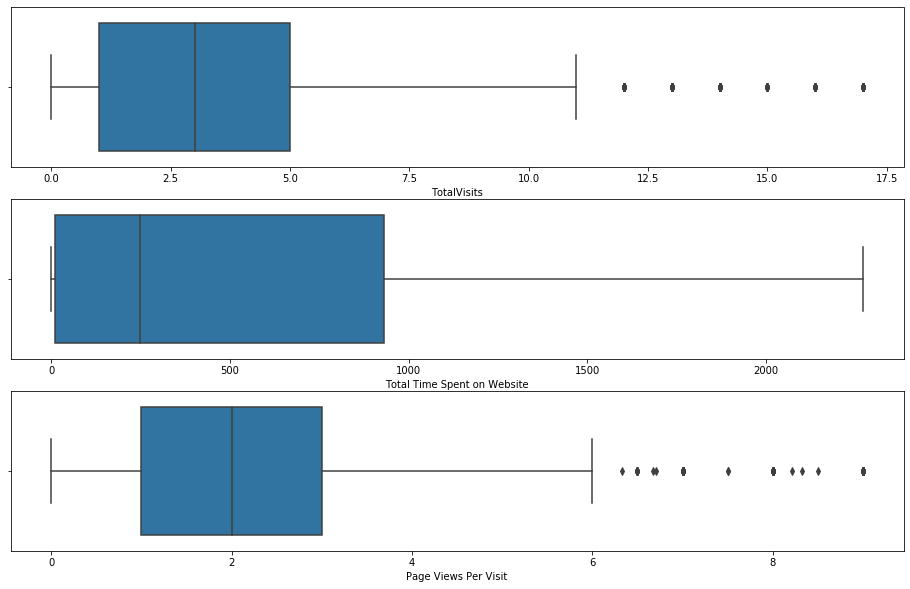

In [47]:
# creating boxplots again to validate if the outliers were removed or not

plt.figure(figsize=[16,10])
plt.subplot(311)
sns.boxplot(df['TotalVisits'])
plt.subplot(312)
sns.boxplot(df['Total Time Spent on Website'])
plt.subplot(313)
sns.boxplot(df['Page Views Per Visit'])
plt.show()

## 3. Preparing the Data for Model Building

### Checking the skewness of the categorical variables

In [48]:
df['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.531607
API                        0.389403
Lead Add Form              0.073550
Lead Import                0.005331
Quick Add Form             0.000109
Name: Lead Origin, dtype: float64

In [49]:
df['Lead Source'].value_counts(normalize=True)

Google               0.315308
Direct Traffic       0.276684
Olark Chat           0.190839
Organic Search       0.125558
Reference            0.055489
Welingak Website     0.014144
Referral Sites       0.013600
Facebook             0.005331
bing                 0.000653
google               0.000544
Click2call           0.000435
Press_Release        0.000218
Live Chat            0.000218
Social Media         0.000218
Pay per Click Ads    0.000109
WeLearn              0.000109
testone              0.000109
blog                 0.000109
welearnblog_Home     0.000109
NC_EDM               0.000109
youtubechannel       0.000109
Name: Lead Source, dtype: float64

In [50]:
df['Do Not Email'].value_counts(normalize=True)

No     0.920574
Yes    0.079426
Name: Do Not Email, dtype: float64

In [51]:
df['Do Not Call'].value_counts(normalize=True)

No     0.999782
Yes    0.000218
Name: Do Not Call, dtype: float64

In [52]:
df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.381025
SMS Sent                        0.298009
Olark Chat Conversation         0.105756
Page Visited on Website         0.069633
Converted to Lead               0.046567
Email Bounced                   0.035034
Email Link Clicked              0.029050
Form Submitted on Website       0.012621
Unreachable                     0.010119
Unsubscribed                    0.006637
Had a Phone Conversation        0.003264
Approached upfront              0.000979
View in browser link Clicked    0.000653
Email Marked Spam               0.000218
Email Received                  0.000218
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [53]:
df['Country'].value_counts(normalize=True)

India                   0.968774
United States           0.007507
United Arab Emirates    0.005767
Singapore               0.002611
Saudi Arabia            0.002285
United Kingdom          0.001632
Australia               0.001414
Qatar                   0.001088
Bahrain                 0.000762
Hong Kong               0.000762
France                  0.000653
Oman                    0.000653
unknown                 0.000544
South Africa            0.000435
Canada                  0.000435
Germany                 0.000435
Nigeria                 0.000435
Kuwait                  0.000435
Sweden                  0.000326
Uganda                  0.000218
Italy                   0.000218
Asia/Pacific Region     0.000218
Belgium                 0.000218
Bangladesh              0.000218
Ghana                   0.000218
China                   0.000218
Netherlands             0.000218
Philippines             0.000218
Sri Lanka               0.000109
Switzerland             0.000109
Russia    

In [54]:
df['Specialization'].value_counts(normalize=True)

Finance Management                   0.468611
Human Resource Management            0.092264
Marketing Management                 0.091176
Operations Management                0.054727
Business Administration              0.043847
IT Projects Management               0.039822
Supply Chain Management              0.037972
Banking, Investment And Insurance    0.036775
Media and Advertising                0.022087
Travel and Tourism                   0.022087
International Business               0.019367
Healthcare Management                0.017300
Hospitality Management               0.012403
E-COMMERCE                           0.012186
Retail Management                    0.010880
Rural and Agribusiness               0.007943
E-Business                           0.006202
Services Excellence                  0.004352
Name: Specialization, dtype: float64

In [55]:
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.896747
Working Professional    0.076705
Student                 0.022848
Other                   0.001741
Housewife               0.001088
Businessman             0.000870
Name: What is your current occupation, dtype: float64

In [56]:
df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999674
Flexibility & Convenience    0.000218
Other                        0.000109
Name: What matters most to you in choosing a course, dtype: float64

In [57]:
df['Search'].value_counts(normalize=True)

No     0.998477
Yes    0.001523
Name: Search, dtype: float64

In [58]:
df['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [59]:
df['Newspaper Article'].value_counts(normalize=True)

No     0.999782
Yes    0.000218
Name: Newspaper Article, dtype: float64

In [60]:
df['X Education Forums'].value_counts(normalize=True)

No     0.999891
Yes    0.000109
Name: X Education Forums, dtype: float64

In [61]:
df['Newspaper'].value_counts(normalize=True)

No     0.999891
Yes    0.000109
Name: Newspaper, dtype: float64

In [62]:
df['Digital Advertisement'].value_counts(normalize=True)

No     0.999565
Yes    0.000435
Name: Digital Advertisement, dtype: float64

In [63]:
df['Through Recommendations'].value_counts(normalize=True)

No     0.999238
Yes    0.000762
Name: Through Recommendations, dtype: float64

In [64]:
df['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [65]:
df['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [66]:
df['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [67]:
df['City'].value_counts(normalize=True)

Mumbai                         0.744750
Thane & Outskirts              0.081819
Other Cities                   0.074638
Other Cities of Maharashtra    0.049505
Other Metro Cities             0.041236
Tier II Cities                 0.008051
Name: City, dtype: float64

In [68]:
df['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [69]:
df['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.68578
Yes    0.31422
Name: A free copy of Mastering The Interview, dtype: float64

In [70]:
df['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.365357
Email Opened                    0.307584
SMS Sent                        0.236318
Page Visited on Website         0.034599
Olark Chat Conversation         0.019911
Email Link Clicked              0.018823
Email Bounced                   0.006528
Unsubscribed                    0.005114
Unreachable                     0.003482
Had a Phone Conversation        0.001523
Email Marked Spam               0.000218
Resubscribed to emails          0.000109
View in browser link Clicked    0.000109
Email Received                  0.000109
Form Submitted on Website       0.000109
Approached upfront              0.000109
Name: Last Notable Activity, dtype: float64

### Removing the below mentioned columns which have highly skewed data
* Do Not Email
* Do Not Call
* Country
* What is your current occupation
* What matters most to you in choosing a course
* Search
* Magazine
* Newspaper Article
* X Education Forums
* Newspaper
* Digital Advertisement
* Through Recommendations
* Receive More Updates About Our Courses
* Update me on Supply Chain Content
* Get updates on DM Content
* I agree to pay the amount through cheque

In [71]:
# Removing highly skewed columns

to_remove=['Do Not Email','Do Not Call','Country','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

df1=df.drop(to_remove, axis=1)

### Inspecting the Dataframe after removing the highly skewed variables

In [72]:
df1.shape

(9191, 12)

In [73]:
df1.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Mumbai,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Mumbai,No,Modified


### Mapping the Yes/No to 1/0 respectively in the categorical variables

In [74]:
# Mapping 'Yes' with 1 and 'No' with 0

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
df1[['A free copy of Mastering The Interview']] = df1[['A free copy of Mastering The Interview']].apply(binary_map)

### Inspecting if the mapping worked correctly or not

In [75]:
df1.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Mumbai,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Mumbai,0,Modified


### Bucketing the categorical variables where there are more number of categories

In [76]:
df1['Lead Origin'] = np.where(~(df1['Lead Origin'].isin(['Landing Page Submission','API'])), "Others", df1['Lead Origin'])

In [77]:
df1['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.531607
API                        0.389403
Others                     0.078990
Name: Lead Origin, dtype: float64

In [78]:
df1['Lead Source'] = np.where(~(df1['Lead Source'].isin(['Google','Direct Traffic','Olark Chat','Organic Search'])), "Others", df1['Lead Source'])

In [79]:
df1['Lead Source'].value_counts(normalize=True)

Google            0.315308
Direct Traffic    0.276684
Olark Chat        0.190839
Organic Search    0.125558
Others            0.091611
Name: Lead Source, dtype: float64

In [80]:
df1['Last Activity'] = np.where(~(df1['Last Activity'].isin(['Email Opened','SMS Sent','Olark Chat Conversation'])), "Others", df1['Last Activity'])

In [81]:
df1['Last Activity'].value_counts(normalize=True)

Email Opened               0.381025
SMS Sent                   0.298009
Others                     0.215211
Olark Chat Conversation    0.105756
Name: Last Activity, dtype: float64

In [82]:
df1['Specialization'] = np.where(~(df1['Specialization'].isin(['Finance Management','Human Resource Management','Marketing Management','Operations Management'])), "Others", df1['Specialization'])

In [83]:
df1['Specialization'].value_counts(normalize=True)

Finance Management           0.468611
Others                       0.293222
Human Resource Management    0.092264
Marketing Management         0.091176
Operations Management        0.054727
Name: Specialization, dtype: float64

In [84]:
df1['City'] = np.where(~(df1['City'].isin(['Mumbai','Thane & Outskirts'])), "Others", df1['City'])

In [85]:
df1['City'].value_counts(normalize=True)

Mumbai               0.744750
Others               0.173431
Thane & Outskirts    0.081819
Name: City, dtype: float64

In [86]:
df1['Last Notable Activity'] = np.where(~(df1['Last Notable Activity'].isin(['Modified','Email Opened','SMS Sent'])), "Others", df1['Last Notable Activity'])

In [87]:
df1['Last Notable Activity'].value_counts(normalize=True)

Modified        0.365357
Email Opened    0.307584
SMS Sent        0.236318
Others          0.090741
Name: Last Notable Activity, dtype: float64

### Creating dummy variables for the categorical columns after bucketing them and also removing one of the dummyfied variables

Dummyfying the column Lead Origin and removing the column LO_Others

In [88]:
# Creating dummy variables for the variable 'Lead Origin'
lo1 = pd.get_dummies(df1['Lead Origin'], prefix='LO')
# Dropping LO_Others column
lo = lo1.drop(['LO_Others'], 1)
#Adding the results to the master dataframe
df1 = pd.concat([df1,lo], axis=1)
df1.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,LO_API,LO_Landing Page Submission
0,660737,API,Olark Chat,0,0.0,0,0.0,Others,Finance Management,Mumbai,0,Modified,1,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,0,Email Opened,1,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Mumbai,1,Email Opened,0,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Mumbai,0,Modified,0,1
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Finance Management,Mumbai,0,Modified,0,1


Dummyfying the column Lead Source and removing the column LS_Others

In [89]:
# Creating dummy variables for the variable 'Lead Source'
ls1 = pd.get_dummies(df1['Lead Source'], prefix='LS')
# Dropping LS_Others column
ls = ls1.drop(['LS_Others'], 1)
#Adding the results to the master dataframe
df1 = pd.concat([df1,ls], axis=1)
df1.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,LO_API,LO_Landing Page Submission,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search
0,660737,API,Olark Chat,0,0.0,0,0.0,Others,Finance Management,Mumbai,0,Modified,1,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,0,Email Opened,1,0,0,0,0,1
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Mumbai,1,Email Opened,0,1,1,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Mumbai,0,Modified,0,1,1,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Finance Management,Mumbai,0,Modified,0,1,0,1,0,0


Dummyfying the column Last Activity and removing the column LA_Others

In [90]:
# Creating dummy variables for the variable 'Last Activity'
la1 = pd.get_dummies(df1['Last Activity'], prefix='LA')
# Dropping LA_Others column
la = la1.drop(['LA_Others'], 1)
#Adding the results to the master dataframe
df1 = pd.concat([df1,la], axis=1)
df1.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,...,Last Notable Activity,LO_API,LO_Landing Page Submission,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search,LA_Email Opened,LA_Olark Chat Conversation,LA_SMS Sent
0,660737,API,Olark Chat,0,0.0,0,0.0,Others,Finance Management,Mumbai,...,Modified,1,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,...,Email Opened,1,0,0,0,0,1,1,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Mumbai,...,Email Opened,0,1,1,0,0,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Mumbai,...,Modified,0,1,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Finance Management,Mumbai,...,Modified,0,1,0,1,0,0,0,0,0


Dummyfying the column Specialization and removing the column SPL_Others

In [91]:
# Creating dummy variables for the variable 'Specialization'
spl1 = pd.get_dummies(df1['Specialization'], prefix='SPL')
# Dropping SPL_Others column
spl = spl1.drop(['SPL_Others'], 1)
#Adding the results to the master dataframe
df1 = pd.concat([df1,spl], axis=1)
df1.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,...,LS_Google,LS_Olark Chat,LS_Organic Search,LA_Email Opened,LA_Olark Chat Conversation,LA_SMS Sent,SPL_Finance Management,SPL_Human Resource Management,SPL_Marketing Management,SPL_Operations Management
0,660737,API,Olark Chat,0,0.0,0,0.0,Others,Finance Management,Mumbai,...,0,1,0,0,0,0,1,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,...,0,0,1,1,0,0,1,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Mumbai,...,0,0,0,1,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Mumbai,...,0,0,0,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Finance Management,Mumbai,...,1,0,0,0,0,0,1,0,0,0


Dummyfying the column City and removing the column CITY_Others

In [92]:
# Creating dummy variables for the variable 'City'
CT1 = pd.get_dummies(df1['City'], prefix='CITY')
# Dropping CITY_Others column
City = CT1.drop(['CITY_Others'], 1)
#Adding the results to the master dataframe
df1 = pd.concat([df1,City], axis=1)
df1.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,...,LS_Organic Search,LA_Email Opened,LA_Olark Chat Conversation,LA_SMS Sent,SPL_Finance Management,SPL_Human Resource Management,SPL_Marketing Management,SPL_Operations Management,CITY_Mumbai,CITY_Thane & Outskirts
0,660737,API,Olark Chat,0,0.0,0,0.0,Others,Finance Management,Mumbai,...,0,0,0,0,1,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,...,1,1,0,0,1,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Mumbai,...,0,1,0,0,0,0,0,0,1,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Mumbai,...,0,0,0,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Finance Management,Mumbai,...,0,0,0,0,1,0,0,0,1,0


Dummyfying the column Last Notable Activity and removing the column LNA_Others

In [93]:
# Creating dummy variables for the variable 'Last Notable Activity'
lna1 = pd.get_dummies(df1['Last Notable Activity'], prefix='LNA')
# Dropping LNA_Others column
lna = lna1.drop(['LNA_Others'], 1)
#Adding the results to the master dataframe
df1 = pd.concat([df1,lna], axis=1)
df1.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,...,LA_SMS Sent,SPL_Finance Management,SPL_Human Resource Management,SPL_Marketing Management,SPL_Operations Management,CITY_Mumbai,CITY_Thane & Outskirts,LNA_Email Opened,LNA_Modified,LNA_SMS Sent
0,660737,API,Olark Chat,0,0.0,0,0.0,Others,Finance Management,Mumbai,...,0,1,0,0,0,1,0,0,1,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,...,0,1,0,0,0,1,0,1,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Mumbai,...,0,0,0,0,0,1,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Mumbai,...,0,0,0,0,0,1,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Finance Management,Mumbai,...,0,1,0,0,0,1,0,0,1,0


### Dropping the original columns for which dummy variables have been created

In [94]:
# Dropping the original columns for which dummies have been created
drop_columns = ['Lead Origin','Lead Source','Last Activity','Specialization','City','Last Notable Activity']

lead = df1.drop(drop_columns, axis=1)

### Inspecting the Dataframe after dropping the categorical variables

In [95]:
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LS_Direct Traffic,LS_Google,...,LA_SMS Sent,SPL_Finance Management,SPL_Human Resource Management,SPL_Marketing Management,SPL_Operations Management,CITY_Mumbai,CITY_Thane & Outskirts,LNA_Email Opened,LNA_Modified,LNA_SMS Sent
0,660737,0,0.0,0,0.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,660728,0,5.0,674,2.5,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,660727,1,2.0,1532,2.0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
3,660719,0,1.0,305,1.0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
4,660681,1,2.0,1428,1.0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [96]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9191 entries, 0 to 9239
Data columns (total 24 columns):
Lead Number                               9191 non-null int64
Converted                                 9191 non-null int64
TotalVisits                               9191 non-null float64
Total Time Spent on Website               9191 non-null int64
Page Views Per Visit                      9191 non-null float64
A free copy of Mastering The Interview    9191 non-null int64
LO_API                                    9191 non-null uint8
LO_Landing Page Submission                9191 non-null uint8
LS_Direct Traffic                         9191 non-null uint8
LS_Google                                 9191 non-null uint8
LS_Olark Chat                             9191 non-null uint8
LS_Organic Search                         9191 non-null uint8
LA_Email Opened                           9191 non-null uint8
LA_Olark Chat Conversation                9191 non-null uint8
LA_SMS Sent          

## 4. Creating the Model

### Creating X and y variables

In [97]:
# Putting feature variable to X
X = lead.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search,...,LA_SMS Sent,SPL_Finance Management,SPL_Human Resource Management,SPL_Marketing Management,SPL_Operations Management,CITY_Mumbai,CITY_Thane & Outskirts,LNA_Email Opened,LNA_Modified,LNA_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,5.0,674,2.5,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1.0,305,1.0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2.0,1428,1.0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [98]:
# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Train-Test split

In [99]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Checking the shape of Train and Test dataframe to check the splitting worked correctly

In [100]:
# Checking if the splitting of data worked correctly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6433, 22)
(2758, 22)
(6433,)
(2758,)


### Variable Scaling

#### Creating a list of numerical variables so that the same can be scaled

In [101]:
#creating a list of numerical variables

vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#### Using standardization to scale the numerical variables

In [102]:
#Creating the scaler object
scaler = StandardScaler()

#Applying the scaler object on the numeric variables of the train dataframe
X_train[vars] = scaler.fit_transform(X_train[vars])

#### Checking the head of the scalled Dataframe

In [103]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search,...,LA_SMS Sent,SPL_Finance Management,SPL_Human Resource Management,SPL_Marketing Management,SPL_Operations Management,CITY_Mumbai,CITY_Thane & Outskirts,LNA_Email Opened,LNA_Modified,LNA_SMS Sent
8331,-0.715847,-0.606883,-0.668719,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
510,-0.405952,-0.754107,-0.668719,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3570,0.523734,1.012589,1.356441,1,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2837,0.523734,-0.434212,1.356441,0,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
1854,-0.715847,-0.457840,-0.668719,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


### Calculating the conversion rate

In [104]:
### Checking the Conversion Rate
Lead_Converted = (sum(lead['Converted'])/len(lead.index))*100
Lead_Converted

38.34185616363834

The conversion rate is 38.34%

## Correlation: creating heatmap to understand the correlation between variables

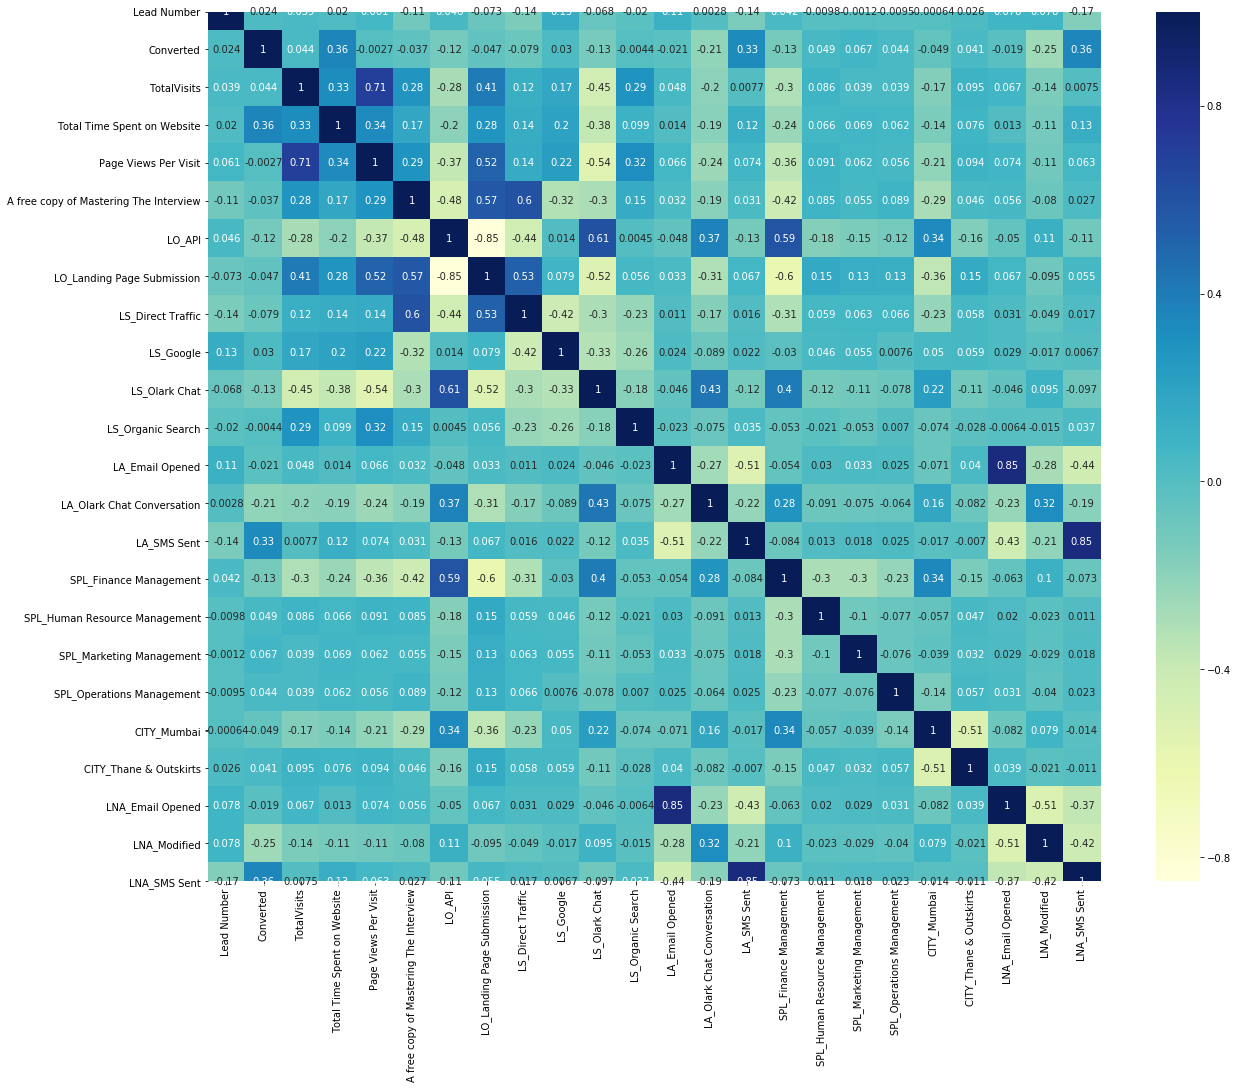

In [105]:
#Checking the correlation between the variables

plt.figure(figsize=(20,16))
sns.heatmap(lead.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Dropping the highly correlated variables from both X_train and X_test datasets

In [106]:
X_train = X_train.drop(['TotalVisits', 'LA_SMS Sent', 'LA_Email Opened','LO_Landing Page Submission'], 1)
#X_test = X_test.drop(['TotalVisits', 'LA_SMS Sent', 'LA_Email Opened','LO_Landing Page Submission'], 1)
X_test = X_test.drop(['LA_SMS Sent', 'LA_Email Opened','LO_Landing Page Submission'], 1)

#### After dropping highly correlated variables. checking the heatmap again to find any other variables that may have high correlation with others

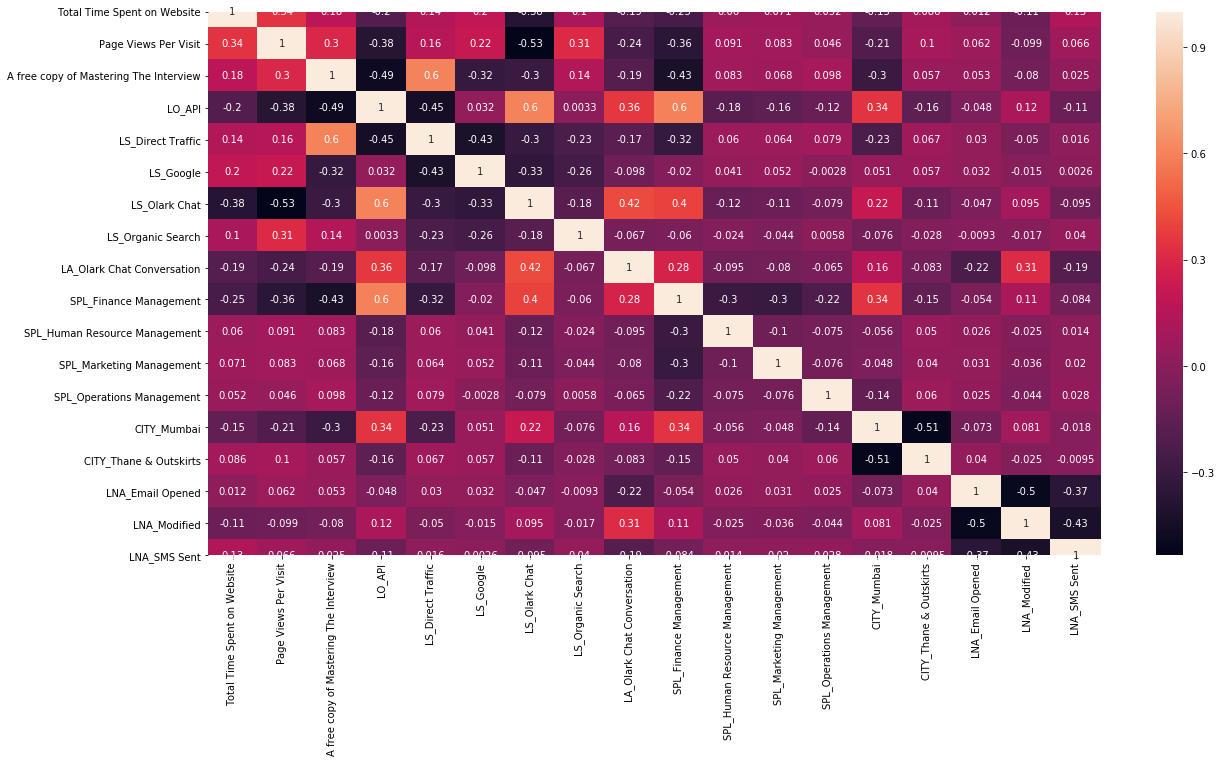

In [107]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### Instecting the X_train dataframe

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6433 entries, 8331 to 5676
Data columns (total 18 columns):
Total Time Spent on Website               6433 non-null float64
Page Views Per Visit                      6433 non-null float64
A free copy of Mastering The Interview    6433 non-null int64
LO_API                                    6433 non-null uint8
LS_Direct Traffic                         6433 non-null uint8
LS_Google                                 6433 non-null uint8
LS_Olark Chat                             6433 non-null uint8
LS_Organic Search                         6433 non-null uint8
LA_Olark Chat Conversation                6433 non-null uint8
SPL_Finance Management                    6433 non-null uint8
SPL_Human Resource Management             6433 non-null uint8
SPL_Marketing Management                  6433 non-null uint8
SPL_Operations Management                 6433 non-null uint8
CITY_Mumbai                               6433 non-null uint8
CITY_Thane & Outsk

### Logistic Regression Model Building

In [109]:
# Logistic regression model

lead_lr1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(lead_lr1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3040.8
Date:                Mon, 01 Jun 2020   Deviance:                       6081.6
Time:                        21:12:57   Pearson chi2:                 6.66e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

We created the model with all the variables initially and in the statistical representation of the model, we found that few of the variables are statistically very insignificant. Hence, we choose to select the most important features by using Automatic Feature Selection technique(RFE).

## Feature Selection using RFE

#### Importing the required library and creating the Logistic Regression object

In [110]:
# Importing required library for using Logistic Regression
from sklearn.linear_model import LogisticRegression

# Creating LogisticRegression object
logreg = LogisticRegression()

#### We have decided to choose 13 most significant variables through the automatic feature selection technique.

In [111]:
# Importing required libraries for using RFE for feature selection
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True])

#### We are looking into the different variables and their ranks as per the statistical sigficance.

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 2),
 ('LO_API', False, 5),
 ('LS_Direct Traffic', True, 1),
 ('LS_Google', True, 1),
 ('LS_Olark Chat', True, 1),
 ('LS_Organic Search', True, 1),
 ('LA_Olark Chat Conversation', True, 1),
 ('SPL_Finance Management', True, 1),
 ('SPL_Human Resource Management', False, 4),
 ('SPL_Marketing Management', True, 1),
 ('SPL_Operations Management', True, 1),
 ('CITY_Mumbai', False, 3),
 ('CITY_Thane & Outskirts', False, 6),
 ('LNA_Email Opened', True, 1),
 ('LNA_Modified', True, 1),
 ('LNA_SMS Sent', True, 1)]

#### Creating a list of 13 most significant columns

In [114]:
col = X_train.columns[rfe.support_]

#### Creating the model again with the 13 most significant variables

In [115]:
X_train_sm = sm.add_constant(X_train[col])
lead_lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lead_lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3043.0
Date:                Mon, 01 Jun 2020   Deviance:                       6085.9
Time:                        21:12:57   Pearson chi2:                 6.67e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5373      0.161      9.535      0.000       1.221       1.853
Total Time Spent on Website     1.0571      0.038     28.184      0.000       0.984       1.131
Page Views Per Visit           -0.2701      0.043     -6.290      0.000      -0.354      -0.186
LS_Direct Traffic              -3.0624      0.137    -22.333      0.000      -3.331      -2.794
LS_Google                      -2.4138      0.132    -18.282      0.000      -2.673      -2.155
LS_Olark Chat                  -1.7879      0.136    -13.194      0.000      -2.053      -1.522
LS_Organic Search              -2.5302      0.157    -16.096      0.000      -2.838      -2.222
LA_Olark Chat Conversation     -1.1796      0.163     -7.248      0.000      -1.499      -0.861
SPL_Finance Management         -0.4007      0.078     -5.106      0.000      -0.554      -0.247
SPL_Marketing Management        0.2912      0.111      2.615      0.009       0.073       0.509
SPL_Operations Management       0.2431      0.143      1.703      0.089      -0.037       0.523
LNA_Email Opened                0.2430      0.122      1.991      0.046       0.004       0.482
LNA_Modified                   -0.3028      0.122     -2.479      0.013      -0.542      -0.063
LNA_SMS Sent                    1.6391      0.126     12.973      0.000       1.391       1.887
===============================================================================================
"""

After creating the model with 13 most significantvariables, we can still see some statistically insignificant variables in them. However, we still want to evaluate the model we have just built.

Using the model to predict the Conversion probability for the first 10 training data

In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8331    0.063595
510     0.161014
3570    0.693823
2837    0.386172
1854    0.232997
1775    0.087430
7078    0.262665
7854    0.059661
504     0.406449
7317    0.091877
dtype: float64

Converting the Conversions into a NumPy array

In [117]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06359508, 0.16101366, 0.69382324, 0.38617249, 0.23299746,
       0.08743021, 0.26266518, 0.05966062, 0.40644901, 0.09187696])

### Creating a dataframe with the actual Converted flag and the predicted probabilities of Conversion

Creating a new dataframe containing the actual converted values with the conversion probabilities for the first 10 rows from the training set

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred, 'Lead_Score':y_train_pred*100})
#y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred*100})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead Number
0,0,0.063595,6.359508,8331
1,0,0.161014,16.101366,510
2,1,0.693823,69.382324,3570
3,1,0.386172,38.617249,2837
4,0,0.232997,23.299746,1854


#### Creating new column 'predicted' with 1 if Conversion Probability > 0.5 else 0

In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50.0 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead Number,predicted
0,0,0.063595,6.359508,8331,0
1,0,0.161014,16.101366,510,0
2,1,0.693823,69.382324,3570,1
3,1,0.386172,38.617249,2837,0
4,0,0.232997,23.299746,1854,0


### Creating the Confusion Matrix

#### Importing the required library

In [120]:
# Importing Library to create the confusion matrix
from sklearn import metrics

Creating the actual confusion matrix

In [121]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3399  583]
 [ 824 1627]]


Since, the number of Conversions that are the top most priority, we will calculate the Sensitivity of the model

In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Checking the Sensityvity
TP / float(TP+FN)

0.6638106895144839

We get the Sensitivity of the model is as low as 66%

Also we calculate the accuracy of the model

In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7812840043525572


The accuracy of the model we get as 78% which is not very impressive.

We use VIF to find the correlation between the variables

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,LNA_Modified,3.22
3,LS_Google,3.19
10,LNA_Email Opened,2.85
4,LS_Olark Chat,2.73
7,SPL_Finance Management,2.69
2,LS_Direct Traffic,2.64
12,LNA_SMS Sent,2.34
5,LS_Organic Search,1.99
1,Page Views Per Visit,1.74
6,LA_Olark Chat Conversation,1.57


We can see that the variables are not correlated with each other very significantly. Hence, based on the statistical significance, we decide to remove the column SPL_Operations Management from the dataframe since this is the most insignificant column.

In [125]:
# Based on the p-value or the statistical significance, we remove the column 'SPL_Operations Management'

col = col.drop('SPL_Operations Management', 1)
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'LS_Direct Traffic', 'LS_Google', 'LS_Olark Chat', 'LS_Organic Search',
       'LA_Olark Chat Conversation', 'SPL_Finance Management',
       'SPL_Marketing Management', 'LNA_Email Opened', 'LNA_Modified',
       'LNA_SMS Sent'],
      dtype='object')

Creating the model again with the reduced number of variables.

In [126]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3044.4
Date:                Mon, 01 Jun 2020   Deviance:                       6088.8
Time:                        21:12:59   Pearson chi2:                 6.66e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5621      0.161      9.731      0.000       1.247       1.877
Total Time Spent on Website     1.0564      0.037     28.183      0.000       0.983       1.130
Page Views Per Visit           -0.2735      0.043     -6.379      0.000      -0.358      -0.189
LS_Direct Traffic              -3.0567      0.137    -22.311      0.000      -3.325      -2.788
LS_Google                      -2.4080      0.132    -18.255      0.000      -2.667      -2.149
LS_Olark Chat                  -1.7867      0.135    -13.189      0.000      -2.052      -1.521
LS_Organic Search              -2.5264      0.157    -16.080      0.000      -2.834      -2.218
LA_Olark Chat Conversation     -1.1799      0.163     -7.251      0.000      -1.499      -0.861
SPL_Finance Management         -0.4314      0.076     -5.651      0.000      -0.581      -0.282
SPL_Marketing Management        0.2612      0.110      2.377      0.017       0.046       0.477
LNA_Email Opened                0.2454      0.122      2.011      0.044       0.006       0.484
LNA_Modified                   -0.3022      0.122     -2.475      0.013      -0.542      -0.063
LNA_SMS Sent                    1.6405      0.126     12.989      0.000       1.393       1.888
===============================================================================================
"""

Converting the Conversions into a NumPy array

In [127]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06377331, 0.16168492, 0.69943164, 0.38544147, 0.23366171,
       0.08755908, 0.2630871 , 0.05966331, 0.41282607, 0.09192073])

Adding a new column as Conversion_Prob so that the same converted as the predicted value of conversion based on a certain cut off

In [128]:
y_train_pred_final['Conversion_Prob'] = y_train_pred
y_train_pred_final['Lead_Score'] = y_train_pred*100

Setting a cutoff of 0.5 and converting the probability into the predicted conversion

In [129]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50.0 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead Number,predicted
0,0,0.063773,6.377331,8331,0
1,0,0.161685,16.168492,510,0
2,1,0.699432,69.943164,3570,1
3,1,0.385441,38.544147,2837,0
4,0,0.233662,23.366171,1854,0


Checking the Accuracy of the model again to idnetify any change in it

In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7817503497590549


By looking into the accuracy, we see that there is no significant change in the accuracy of the model. This means that the column we removed from the model was not really affecting the target variable.

Creating the confusion matrix again

In [131]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3404  578]
 [ 826 1625]]


Checking the Sensitivity of the model again

In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Checking the Sensityvity
TP / float(TP+FN)

0.6629946960424317

We found that there is no such change in the sensitivity as well. Thus, the new model is not able to predict the conversion probabilities better than the previous model.

Checking the VIF again to find the correlation of the model.

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,LNA_Modified,3.21
3,LS_Google,3.15
9,LNA_Email Opened,2.83
4,LS_Olark Chat,2.72
2,LS_Direct Traffic,2.61
7,SPL_Finance Management,2.56
11,LNA_SMS Sent,2.32
5,LS_Organic Search,1.97
1,Page Views Per Visit,1.74
6,LA_Olark Chat Conversation,1.57


We can see that the variables are not correlated with each other very significantly. Hence, based on the statistical significance, we decide to remove the column LNA_Email Opened from the dataframe since this is the most insignificant column.

In [134]:
# Based on the p-value or the statistical significance, we remove the column 'LNA_Email Openednt'

col = col.drop('LNA_Email Opened', 1)
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'LS_Direct Traffic', 'LS_Google', 'LS_Olark Chat', 'LS_Organic Search',
       'LA_Olark Chat Conversation', 'SPL_Finance Management',
       'SPL_Marketing Management', 'LNA_Modified', 'LNA_SMS Sent'],
      dtype='object')

Again we are creating the model with the reduced number of columns

In [135]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3046.5
Date:                Mon, 01 Jun 2020   Deviance:                       6092.9
Time:                        21:13:00   Pearson chi2:                 6.67e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.7600      0.127     13.861      0.000       1.511       2.009
Total Time Spent on Website     1.0556      0.037     28.179      0.000       0.982       1.129
Page Views Per Visit           -0.2715      0.043     -6.336      0.000      -0.355      -0.188
LS_Direct Traffic              -3.0627      0.137    -22.360      0.000      -3.331      -2.794
LS_Google                      -2.4101      0.132    -18.270      0.000      -2.669      -2.152
LS_Olark Chat                  -1.7865      0.135    -13.195      0.000      -2.052      -1.521
LS_Organic Search              -2.5305      0.157    -16.110      0.000      -2.838      -2.223
LA_Olark Chat Conversation     -1.2365      0.160     -7.706      0.000      -1.551      -0.922
SPL_Finance Management         -0.4305      0.076     -5.641      0.000      -0.580      -0.281
SPL_Marketing Management        0.2641      0.110      2.405      0.016       0.049       0.479
LNA_Modified                   -0.4916      0.077     -6.397      0.000      -0.642      -0.341
LNA_SMS Sent                    1.4447      0.079     18.174      0.000       1.289       1.601
===============================================================================================
"""

Now we see from the statistical representation that all the variables are now statistically significant. Also to be more sure, we check the correlation by using VIF.

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,SPL_Finance Management,2.46
4,LS_Olark Chat,2.23
3,LS_Google,1.96
9,LNA_Modified,1.94
1,Page Views Per Visit,1.73
2,LS_Direct Traffic,1.53
6,LA_Olark Chat Conversation,1.52
5,LS_Organic Search,1.49
10,LNA_SMS Sent,1.48
0,Total Time Spent on Website,1.25


From the VIF, we can see that the VIF is values for every column is now below 3 and this means that the model is a stable one and variables are independent to each other. 

Again, converting the conversion probabilities into NumPy array.

In [137]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06393289, 0.15511549, 0.69902565, 0.38640141, 0.23518091,
       0.0832603 , 0.25390661, 0.05700177, 0.40076919, 0.10933287])

Adding a new column as Conversion_Prob so that the same converted as the predicted value of conversion based on a certain cut off

In [138]:
y_train_pred_final['Conversion_Prob'] = y_train_pred
y_train_pred_final['Lead_Score'] = y_train_pred*100

Setting a cutoff of 0.5 and converting the probability into the predicted conversion

In [139]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50.0 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead Number,predicted
0,0,0.063933,6.393289,8331,0
1,0,0.155115,15.511549,510,0
2,1,0.699026,69.902565,3570,1
3,1,0.386401,38.640141,2837,0
4,0,0.235181,23.518091,1854,0


Checking the overall accuracy of the model.

In [140]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7797295196642313


Creating the confusion matrix again for the newly built model.

In [141]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3396  586]
 [ 831 1620]]


Checking the Sensitivity anagin

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Checking the Sensityvity
TP / float(TP+FN)

0.6609547123623011

By looking into the sensitivity, we see that there is no such improvement in the sensitivity. Hence, we decided to vary the probability cutoff to see if the sensitivity improves.

Applying ROC curve technique to find out the optimum cutoff for the conversion probability.

# Plotting the ROC Curve

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

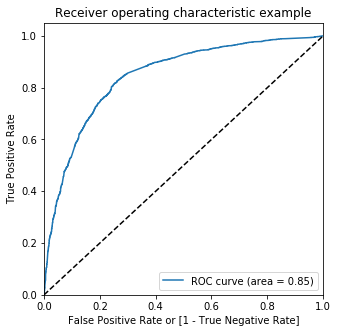

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

After plotting the ROC curve, we see that the area under the curve is 0.85 which is very high and this is indicates that the model that we have built is a good model.

# Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.063933,6.393289,8331,0,1,0,0,0,0,0,0,0,0,0
1,0,0.155115,15.511549,510,0,1,1,0,0,0,0,0,0,0,0
2,1,0.699026,69.902565,3570,1,1,1,1,1,1,1,1,0,0,0
3,1,0.386401,38.640141,2837,0,1,1,1,1,0,0,0,0,0,0
4,0,0.235181,23.518091,1854,0,1,1,1,0,0,0,0,0,0,0


For different probability, we calculate the Accuracy, Sensitivity and Specificity for the model.

In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381004  1.000000  0.000000
0.1   0.1  0.544381  0.972256  0.281015
0.2   0.2  0.702627  0.903305  0.579106
0.3   0.3  0.770247  0.830273  0.733300
0.4   0.4  0.779108  0.753162  0.795078
0.5   0.5  0.779730  0.660955  0.852838
0.6   0.6  0.762008  0.524684  0.908086
0.7   0.7  0.733406  0.392901  0.942993
0.8   0.8  0.705581  0.275806  0.970116
0.9   0.9  0.658635  0.121175  0.989453


We plot three curves for three different characteristics against the probability to find the optimum cutoff. We know that the intersection point is the optimum cutoff point.

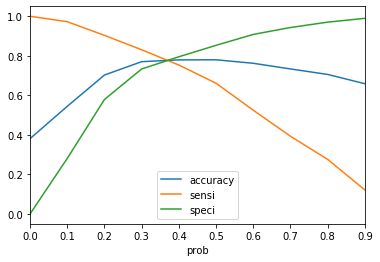

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We see that the point of intersection is somewhere between 0.3 and 0.4. Hence, we consider the cutoff as 0.3 and try to predict the final probability of the train set. 

Predicting the final probability of Lead Conversion with probability cutoff as 0.3

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 30.0 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.063933,6.393289,8331,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.155115,15.511549,510,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.699026,69.902565,3570,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.386401,38.640141,2837,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.235181,23.518091,1854,0,1,1,1,0,0,0,0,0,0,0,0


Checking the overall Accuracy of the model

In [149]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7702471630654438

The overall Accuracy is now becomes 77%.

Creating the confusion matrix.

In [150]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2920, 1062],
       [ 416, 2035]], dtype=int64)

Calculating the Sensitivity of the model built.

In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Checking the Sensityvity
TP / float(TP+FN)

0.8302733578131375

The final Sensitivity of the model becomes 83% with a probability of 0.3

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.7332998493219488

The Specificity of the model is 73%

## Precision and Recall

In [153]:
confusion

array([[2920, 1062],
       [ 416, 2035]], dtype=int64)

Calculating Precision of the model from the confusion matrix

In [154]:
#precision
prec = confusion[1,1]/(confusion[0,1]+confusion[1,1])
prec

0.657087504036164

Calculating the Recall of the model

In [155]:
#Recall
reca = confusion[1,1]/(confusion[1,0]+confusion[1,1])
reca

0.8302733578131375

#### F1 Score

In [156]:
F1 = 2*((prec * reca)/(prec + reca))
F1

0.7335976928622928

We get the F1 Score for the model as 73% which is another form of representing model wellness.

## Precision and recall tradeoff

There is a trade off between Precision and Recall for the model we biult. There is an optimum point at which both Precision and Recall are same. Other than this point, these two metrices behave like invesely proportional to each other.

In [157]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6428    1
 6429    0
 6430    1
 6431    1
 6432    0
 Name: Converted, Length: 6433, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6428    1
 6429    0
 6430    1
 6431    0
 6432    1
 Name: predicted, Length: 6433, dtype: int64)

Plotting Precision vs Recall for different probablity threshold

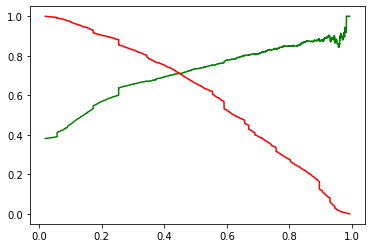

In [158]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

We see that the optimum point lies after 0.3 and this means considering 0.3 as threshold is okay.

# Making predictions on the test set

In [159]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search,LA_Olark Chat Conversation,SPL_Finance Management,SPL_Human Resource Management,SPL_Marketing Management,SPL_Operations Management,CITY_Mumbai,CITY_Thane & Outskirts,LNA_Email Opened,LNA_Modified,LNA_SMS Sent
7864,3.0,26,3.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
8362,3.0,541,3.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2709,4.0,1412,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
7622,8.0,55,4.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3881,3.0,130,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


We need to apply scaling on the numeric variables of the test set.

In [160]:
X_test[vars]=scaler.transform(X_test[vars])

In [161]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search,LA_Olark Chat Conversation,SPL_Finance Management,SPL_Human Resource Management,SPL_Marketing Management,SPL_Operations Management,CITY_Mumbai,CITY_Thane & Outskirts,LNA_Email Opened,LNA_Modified,LNA_SMS Sent
7864,-0.096056,-0.843169,0.343861,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
8362,-0.096056,0.092889,0.343861,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2709,0.213839,1.676008,0.850151,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
7622,1.453420,-0.790459,0.850151,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3881,-0.096056,-0.654140,0.343861,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Selecting onky the columns that were used to create the final model and applied on the train set

In [162]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search,LA_Olark Chat Conversation,SPL_Finance Management,SPL_Marketing Management,LNA_Modified,LNA_SMS Sent
7864,-0.843169,0.343861,1,0,0,0,0,0,0,1,0
8362,0.092889,0.343861,1,0,0,0,0,0,0,0,0
2709,1.676008,0.850151,0,1,0,0,0,0,0,0,1
7622,-0.790459,0.850151,0,0,0,1,0,0,0,0,1
3881,-0.654140,0.343861,0,1,0,0,0,0,0,0,1


Adding a constant to the test set

In [163]:
X_test_sm = sm.add_constant(X_test)

Predicting the final conversion probability from the test set

In [164]:
y_test_pred = res.predict(X_test_sm)

First 10 values from the test set are predicted the probablity of lead conversion.

In [165]:
y_test_pred[:10]

7864    0.058541
8362    0.214503
2709    0.911582
7622    0.403474
3881    0.502702
1185    0.093689
2526    0.317899
2520    0.131495
5222    0.156522
2295    0.324597
dtype: float64

Converting y_pred to a dataframe which is an array

In [166]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
# Let's see the head
y_pred_1.head()

,0
7864,0.058541
8362,0.214503
2709,0.911582
7622,0.403474
3881,0.502702


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

Creating field Lead Number along with actual converted field values

In [169]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [170]:
y_test_df.head()

,Converted,Lead Number
7864,0,7864
8362,1,8362
2709,1,2709
7622,0,7622
3881,1,3881


Removing index for both dataframes to append them side by side

In [171]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

Appending y_test_df and y_pred_1

In [172]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [173]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,7864,0.058541
1,1,8362,0.214503
2,1,2709,0.911582
3,0,7622,0.403474
4,1,3881,0.502702


Renaming the field 0 to Conversion_Prob

In [174]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

Renaming the CustID column to Lead Number

In [175]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 'CustID' : 'Lead Number'})

In [176]:
y_pred_final['Lead_Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob,Lead_Score
0,0,7864,0.058541,5.854126
1,1,8362,0.214503,21.450275
2,1,2709,0.911582,91.158164
3,0,7622,0.403474,40.347358
4,1,3881,0.502702,50.270174


Rearranging the final predicted dataframe

In [177]:
y_pred_final = y_pred_final[['Lead Number', 'Converted', 'Conversion_Prob', 'Lead_Score']]

In [178]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,Lead_Score
0,7864,0,0.058541,5.854126
1,8362,1,0.214503,21.450275
2,2709,1,0.911582,91.158164
3,7622,0,0.403474,40.347358
4,3881,1,0.502702,50.270174


Setting the same cutoff 0.3 using which the model on train was created. 

In [179]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 30.0 else 0)

In [180]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,Lead_Score,final_predicted
0,7864,0,0.058541,5.854126,0
1,8362,1,0.214503,21.450275,0
2,2709,1,0.911582,91.158164,1
3,7622,0,0.403474,40.347358,1
4,3881,1,0.502702,50.270174,1


Calculating the overall accuracy of the model

In [181]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.780638143582306

The final overall accuracy of the test dats is 78% which is almost same with the train model accuracy.

Creating the confusion matrix with the test data

In [182]:
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1269,  416],
       [ 189,  884]], dtype=int64)

Calculating the Sensitivity of the final model

In [183]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8238583410997204

We see that the final sensitivity of the model for test data is 82.4% which is very good.

#### Hence, the final model is as below:

## Converted = 1.76 - 3.06 * LS_Direct Traffic - 2.53 * LS_Organic Search - 2.41 * LS_Google -1.79 * LS_Olark Chat + 1.44 * LNA_SMS Sent - 1.24 * LA_Olark Chat Conversation + 1.06 * Total Time Spent on Website - 0.49 * LNA_Modified -0.43 * SPL_Finance Management - 0.27 * Page Views Per Visit + 0.26 * SPL_Marketing Management